In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('data-set/exames.csv')

# Tratar os valores nulos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [4]:
dataset.drop(columns=['exame_33'],inplace = True)

## Separar os dados

In [5]:
x = dataset.drop(columns=['id','diagnostico'])
x.shape

(569, 32)

In [6]:
y = dataset['diagnostico']
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x,y, test_size = 0.3)

In [8]:
train_x.shape

(398, 32)

In [9]:
train_y.shape

(398,)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
modelo = RandomForestClassifier(n_estimators=100)

modelo.fit(train_x, train_y)
print(f'Acuracia de {modelo.score(test_x,test_y)*100} % ')

Acuracia de 92.39766081871345 % 


In [12]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(train_x,train_y)

print(f'Acuracia de {dummy_model.score(test_x,test_y)*100} % ')

Acuracia de 66.66666666666666 % 


## Utilizar o Scaller do sklearn

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

# Gráfico de visualização

In [15]:
x_scaler = pd.DataFrame(data = x_scaler,
                       columns = x.keys())

In [16]:
def create_violin(valores,inicio,fim):
    dataset_plot = pd.concat([y,valores.iloc[:,inicio:fim]],axis=1)

    dataset_plot = pd.melt(dataset_plot, id_vars="diagnostico",
                       var_name="exames",
                       value_name='valores')
    plt.figure(figsize=(10,10))

    sns.violinplot(x = dataset_plot['exames'],y = dataset_plot['valores'], hue = dataset_plot['diagnostico'], split = True)

    plt.xticks(rotation = 90)

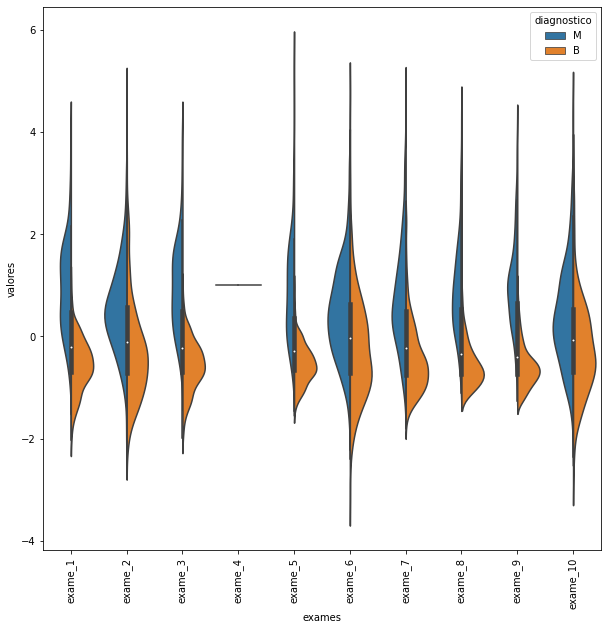

In [17]:
create_violin(x_scaler,0,10)

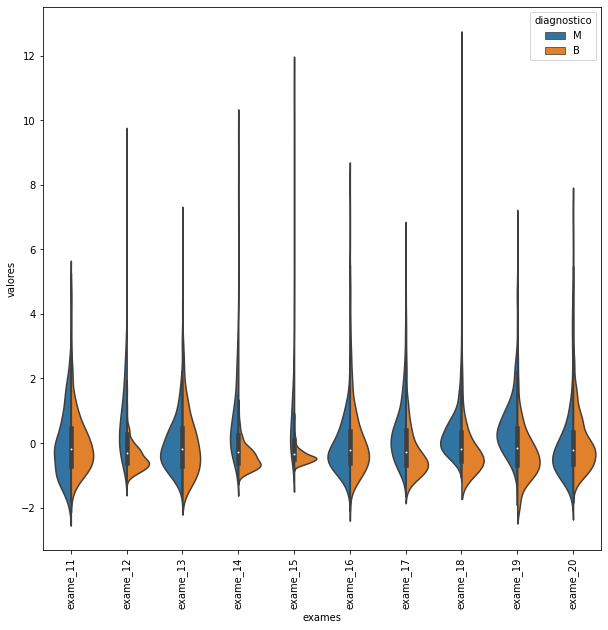

In [18]:
create_violin(x_scaler,10,20)

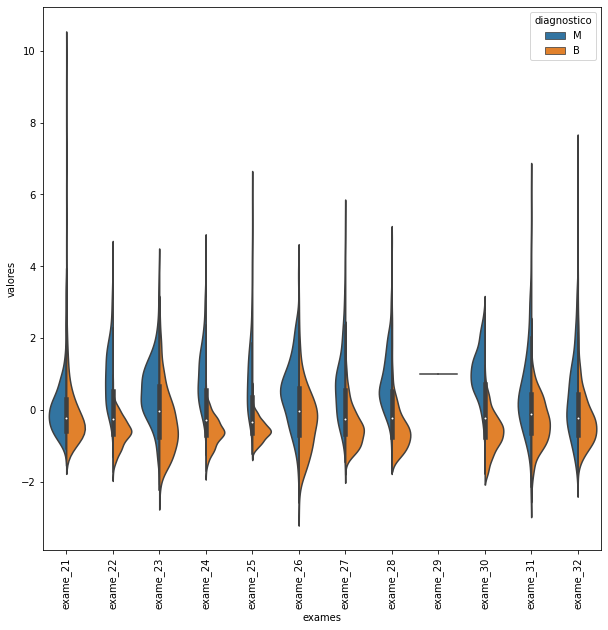

In [19]:
create_violin(x_scaler,20,32)

In [20]:
# Remoção das constantes
x_sem_constantes = x_scaler.drop(columns = ['exame_29','exame_4'])

In [21]:
def classifier(valores,modelo):
    SEED = 1234
    random.seed(SEED)
    
    train_x,test_x,train_y,test_y = train_test_split(valores,y, test_size = 0.3)
    
    modelo.fit(train_x,train_y)
    print(f"Acuracia de {(modelo.score(test_x,test_y)*100):.2f} %")

In [22]:
#RandomForestClassifier com os dados após a remoção das colunas que são sempre iguais
modelo = RandomForestClassifier(n_estimators=100)
classifier(x_sem_constantes,modelo)

Acuracia de 92.98 %


In [23]:
#RandomForestClassifier com os dados brutos
modelo = RandomForestClassifier(n_estimators=100)
classifier(x,modelo)

Acuracia de 92.40 %


## Calculo de Correlação

In [24]:
corr = x_sem_constantes.corr() #se valro 1 correlação alta, caso -1 correlação baixa, caso 0 sem correlação

<AxesSubplot:>

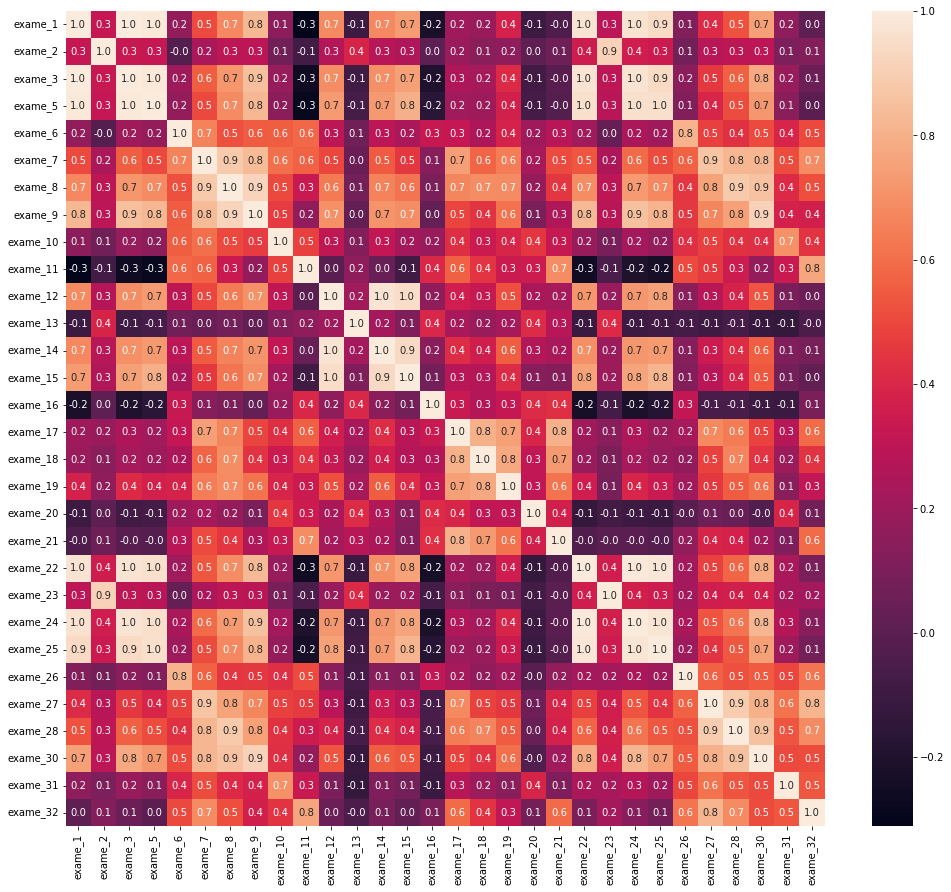

In [25]:
plt.figure(figsize = (17,15))
sns.heatmap(corr, annot = True, fmt = ".1f")

In [26]:
corr_notnull = corr[corr> 0.99]

In [27]:
corr_sum = corr_notnull.sum()

In [28]:
var_corr = corr_sum[corr_sum>1]
var_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [29]:
valores_sem_corr = x_sem_constantes.drop(columns = var_corr.keys())

In [30]:
#RandomForestClassifier com os dados sem as correlações, mas apagando todas as correlações
modelo = RandomForestClassifier(n_estimators=100)
classifier(valores_sem_corr,modelo)

Acuracia de 91.81 %


In [31]:
valores_sem_corr = x_sem_constantes.drop(columns = ['exame_3','exame_24'])

In [32]:
#RandomForestClassifier com os dados sem as correlações, mas apagando uma de cada correlações
modelo = RandomForestClassifier(n_estimators=100)
classifier(valores_sem_corr,modelo)

Acuracia de 92.98 %


## K best

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_kbest = SelectKBest(chi2, k = 5)

In [34]:
select_kbest

SelectKBest(k=5, score_func=<function chi2 at 0x0000016F12CED940>)

In [35]:
x_clear = x.drop(columns= ['exame_4','exame_29','exame_3','exame_24'])

In [36]:
SEED = 1234
random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x_clear,y, test_size = 0.3)


select_kbest.fit(train_x,train_y)
train_kbest = select_kbest.transform(train_x)
test_kbest = select_kbest.transform(test_x)

In [37]:
train_kbest.shape

(398, 5)

In [38]:
#RandomForestClassifier com os dados apos o KBEST
modelo = RandomForestClassifier(n_estimators=100,random_state=1234)
modelo.fit(train_kbest,train_y)
print(f"Acuracia de {(modelo.score(test_kbest,test_y)*100):.2f} %")

Acuracia de 92.40 %


# Matriz de confusão

In [84]:
from sklearn.metrics import confusion_matrix

In [86]:
matrix_confusion = confusion_matrix(test_y, modelo.predict(test_kbest))

In [87]:
matrix_confusion

array([[100,   5],
       [  8,  58]], dtype=int64)

In [88]:
sns.set()
sns.heatmap(confusion_matrix, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

ValueError: Must pass 2-d input. shape=()

# RFE Recorsive feature eliminitation
- Modo para classificar as features de acordo com sua importância e remover as de menor importância

Acuracia de 92.40 %


[Text(0.5, 12.5, 'Predição'), Text(30.5, 0.5, 'Real')]

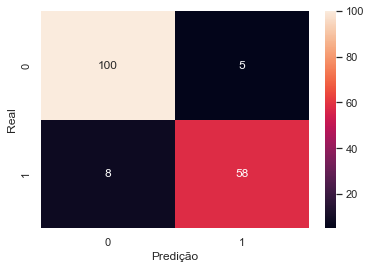

In [89]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

train_x,test_x,train_y,test_y = train_test_split(x_clear,y, test_size = 0.3)

modelo = RandomForestClassifier(n_estimators=100,random_state = 1234)
modelo.fit(train_x, train_y)

select_rfe = RFE(estimator = modelo, n_features_to_select = 5, step = 1)

select_rfe.fit(train_x,train_y)
train_rfe = select_kbest.transform(train_x)
test_rfe = select_kbest.transform(test_x)

modelo.fit(train_rfe,train_y)
print(f"Acuracia de {(modelo.score(test_rfe,test_y)*100):.2f} %")


confusion_matrix = confusion_matrix(test_y, modelo.predict(test_rfe))

sns.set()
sns.heatmap(confusion_matrix, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")